In [1]:
#2018/08/27 from PCO1.3S04_uniformMRF, keep only the PSF part
# reload already processed data.

#
#2018/04/23 from PCO1S10_ionfigured.
# Effects of ion beam figuring.
# Note that the starting set of data had tag on top of plot and this is kept in analysis

%reset
%pylab
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
#from pySurf.fit_cylinder import *
#from pySurf.points import *
from pySurf.points import plot_points,matrix_to_points2
from pySurf.points import subtract_points,level_points,points_autoresample
from pySurf.points import points_find_hull,crop_points,save_points,get_points
from pySurf.psd2d import calculatePSD,plotPSDs,PSDplot
#from calibrate_align import *
from pyProfile.profile import polyfit_profile
from plotting.multiplots import compare_images
from dataIO.fn_add_subfix import fn_add_subfix
from dataIO.span import span
#from PSDanalysis import *
from pySurf.instrumentReader import matrix4D_reader
from pySurf.instrumentReader import points_reader
import os
from pySurf.instrumentReader import bin_reader
from plotting.add_clickable_markers import add_clickable_markers

In [5]:
%qtconsole

In [6]:
pwd

'G:\\My Drive\\libraries\\python\\userKov3\\pyProfile\\test'

In [7]:
from pySurf.psd2d import calculatePSD
from utilities.imaging.fitting import fitCylMisalign, legendre2d
from utilities.imaging.man import stripnans

# Compare cut

In [9]:
outfolder=r'spizzichino\testHEW_PCO1.3S04_uniformMRF'  #set output

In [10]:
#absolute position of fiducials from PCO1S25
#ref=[[14.619, 20.055],[5.136, 7.307],[3.115, -14.458],[12.753, -30.004]]

## data after figuring

compare different files

In [11]:
from pySurf.instrumentReader import fitsWFS_reader
from pySurf.affine2D import plot_transform,find_rototrans,find_affine
from pySurf.distanceTable import distanceTable
from pySurf.data2D import plot_data
from pySurf.points import resample_points,resample_grid
from plotting.backends import maximize

In [24]:
ypix=None #0.127901442999 #mm  
ytox=220./200.  
zscale=None #0.6328
scale=(1000,-1000,0.001)

#get data from 4D measurement of PCO1.2S01
infolder=outfolder  #r'G:\My Drive\Shared by Vincenzo\Metrology logs and data\measure_data\4D_data\Metrology'
wf1=os.path.join(infolder,r'180502_RefSub_PCO1.3S04.csv')#r'PCO1.3S04\180502_PCO1.3S04_MRF\180502_RefSub_PCO1.3S04.csv')
outfile1=os.path.join(outfolder,os.path.basename(wf1))

## Before figuring

In [25]:
#for 09/21 measurements
ypix=None #0.127901442999 #mm  
ytox=220./200.  
zscale=None #0.6328
scale=(1000,-1000,0.001)

wf2=os.path.join(infolder,r'170919_PCO1.3S04_Refsub.csv') #r'PCO1.3S04\170918_PCO1.3S04_cut\170919_PCO1.3S04_Refsub.csv')
outfile2=os.path.join(outfolder,os.path.basename(wf2))

## Slopes and PSF

In [49]:

from pySurf.data2D import plot_slope_2D,plot_slope_slice,level_data

In [74]:
#experimental attempt to evaluate optical quality of a profile.
from pyProfile.profile import PSF_spizzichino,line,reflect_profile

In [29]:
#alternative entry point
p1=get_points(fn_add_subfix(outfile1,'','.dat'),delimiter=' ')  #figured
pd=get_points(fn_add_subfix(outfile2,'_align','.dat'),delimiter=' ')  #original
diff=get_points(fn_add_subfix(outfile2,'_diff','.dat'),delimiter=' ')

In [14]:
#data2D with crop on center
wdata,x,y=points_autoresample(level_points(crop_points(p1,[-35,35],[-35,35])),cut=1)  #figured
wdata2,x2,y2=points_autoresample(level_points(crop_points(pd,[-35,35],[-35,35])),cut=1)  #original converted
ddata,dx,dy=points_autoresample(level_points(crop_points(diff,[-35,35],[-35,35])),cut=1)

In [40]:
#minimal crop (not centered)
wdata,x,y=points_autoresample(level_points(crop_points(p1,[-58,56],[-53,59])),cut=1)  #figured
wdata2,x2,y2=points_autoresample(level_points(crop_points(pd,[-58,56],[-53,59])),cut=1)  #original converted
ddata,dx,dy=points_autoresample(level_points(crop_points(diff,[-58,56],[-53,59])),cut=1)

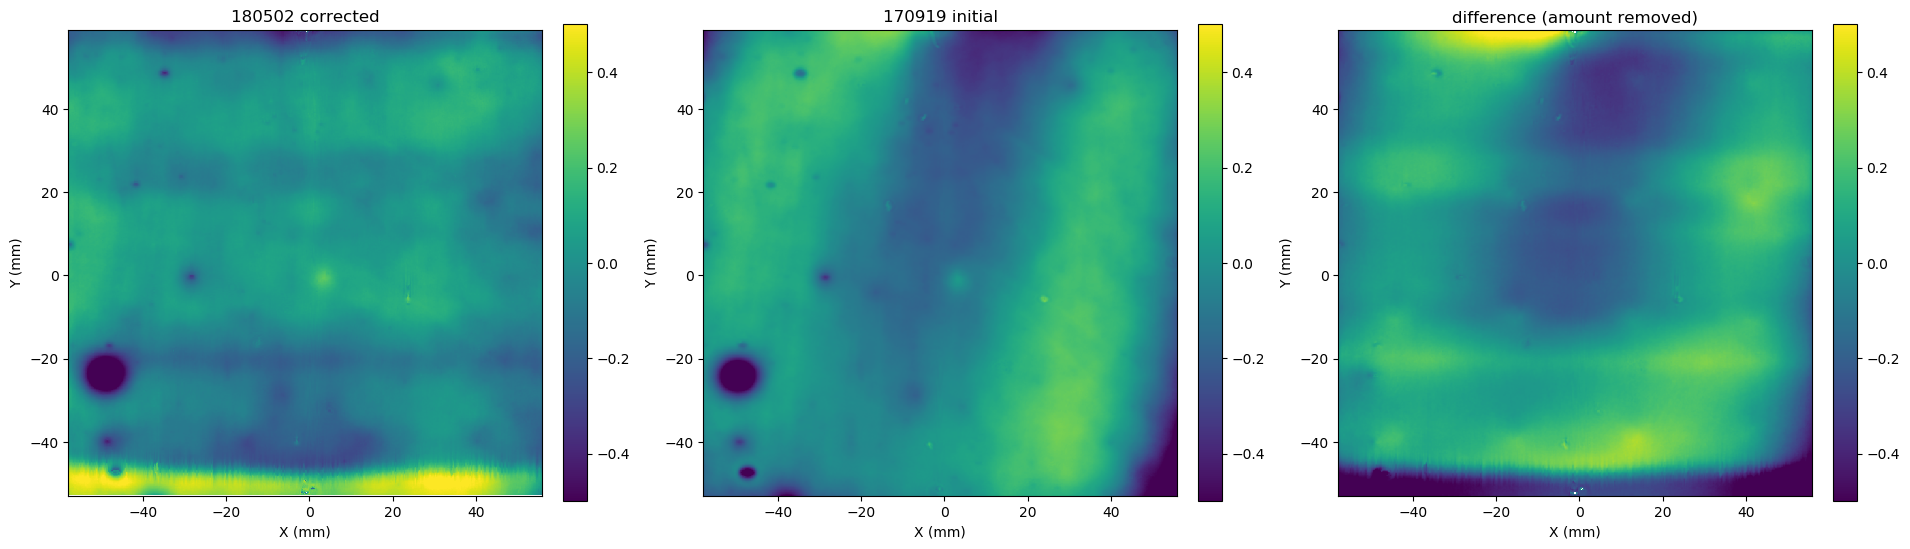

In [43]:
#plot data after crop

plt.figure()
maximize()
ax1=plt.subplot(131)
plot_data(wdata,x,y)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('180502 corrected')  
#plot_points(p1)
plt.clim([-0.5,0.5])

ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
plot_data(wdata2,x2,y2)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('170919 initial')  
#plot_points(pd)
plt.clim([-0.5,0.5])

ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
plot_data(*level_data(ddata,dx,dy))
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('difference (amount removed)')  
#plot_points(level_points(diff))
plt.clim([-0.5,0.5])

#plt.xlim([-57,57])
#plt.ylim([-57,57])


plt.pause(0.01) #this is needed to give some hope that following processing gets applied (e.g. tight_layout)
plt.tight_layout()
plt.show()

display(plt.gcf())

In [44]:
plt.savefig(os.path.join(outfolder,r'datadiff.png'))

resampling...
resampling...
resampling...


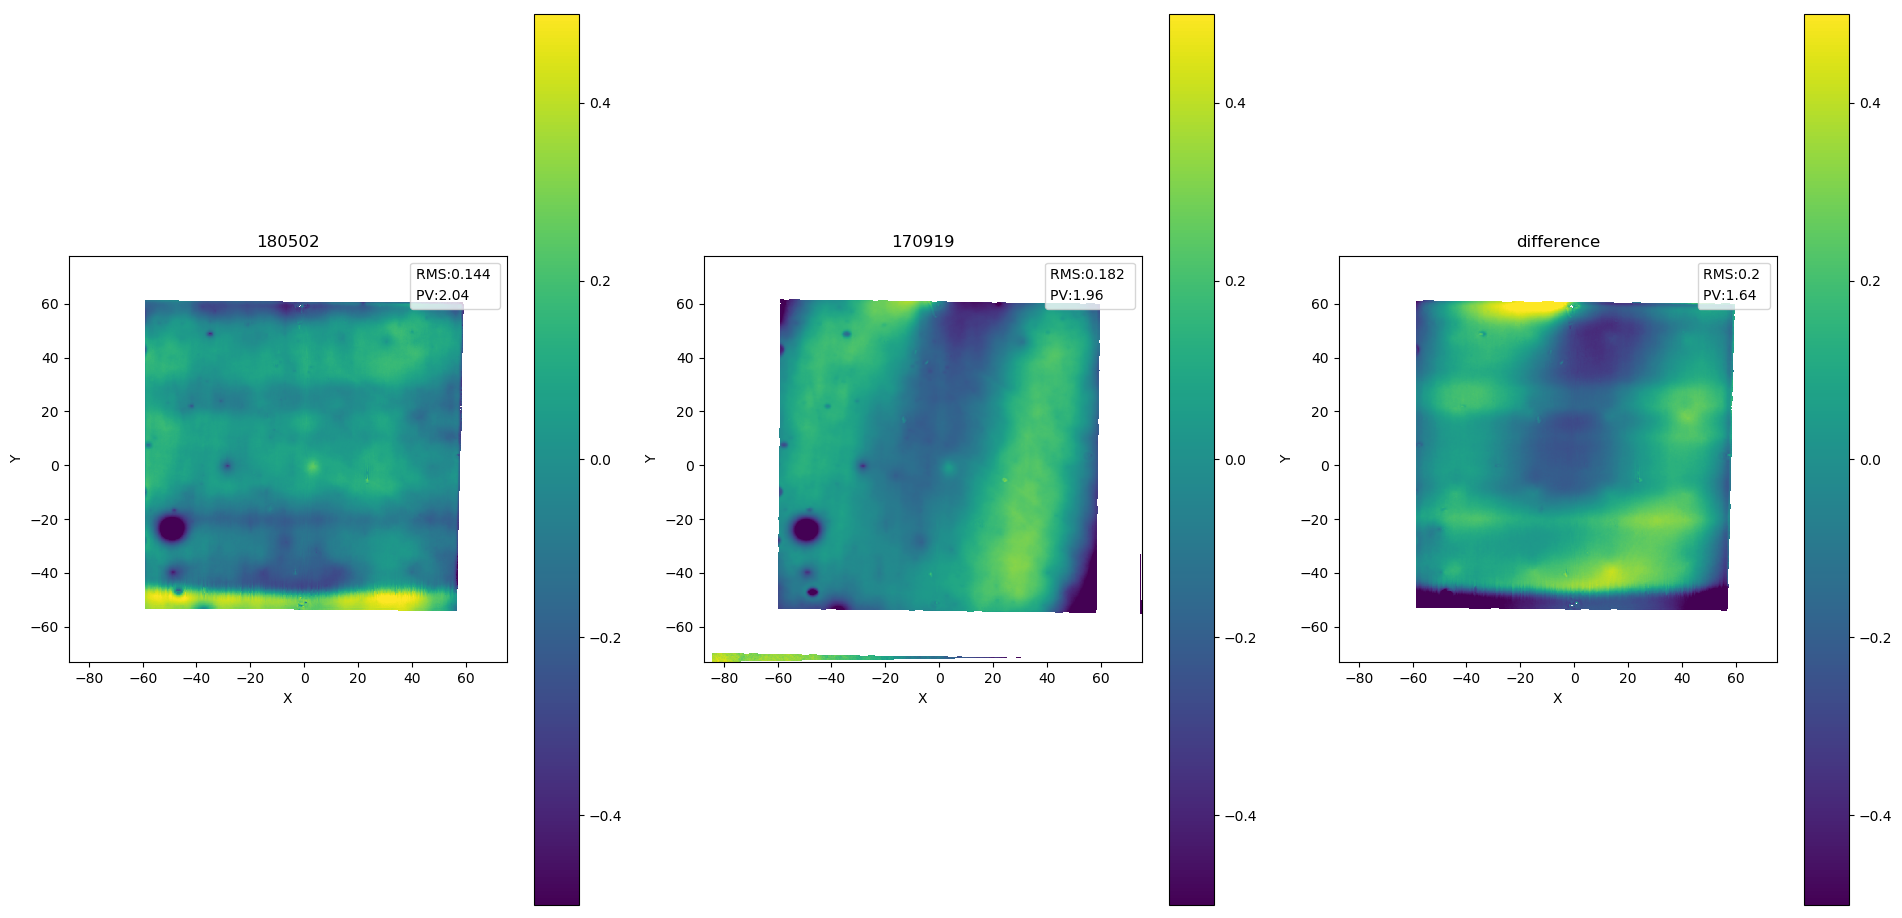

In [42]:
#same plot using points (not cropped)
plt.figure()
maximize()
ax1=plt.subplot(131)
#plot_data(wdata,x,y)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('180502')  
plot_points(p1)
plt.clim([-0.5,0.5])

ax2=plt.subplot(132,sharex=ax1,sharey=ax1)
#plot_data(wdata2,x2,y2)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('170919')  
plot_points(pd)
plt.clim([-0.5,0.5])

ax3=plt.subplot(133,sharex=ax1,sharey=ax1)
#plot_data(*level_data(ddata,dx,dy))
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('difference')  
plot_points(level_points(diff))
plt.clim([-0.5,0.5])

plt.pause(0.01) #this is needed to give some hope that following processing gets applied (e.g. tight_layout)
plt.tight_layout()
plt.show()

display(plt.gcf())

## Here just verifications and profiles extractions

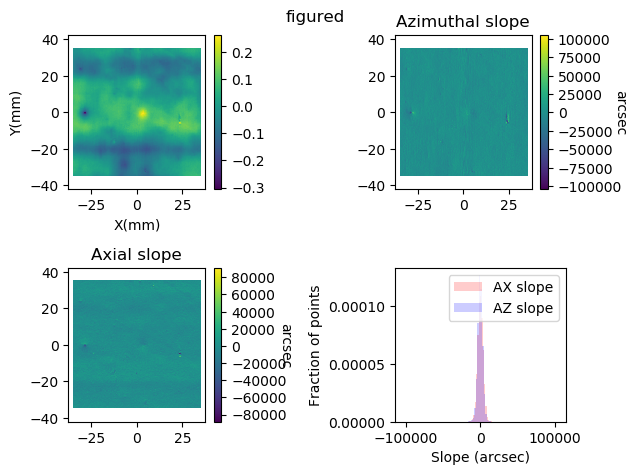

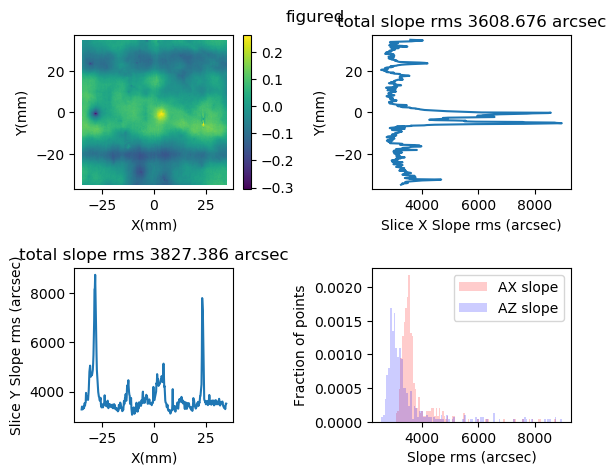

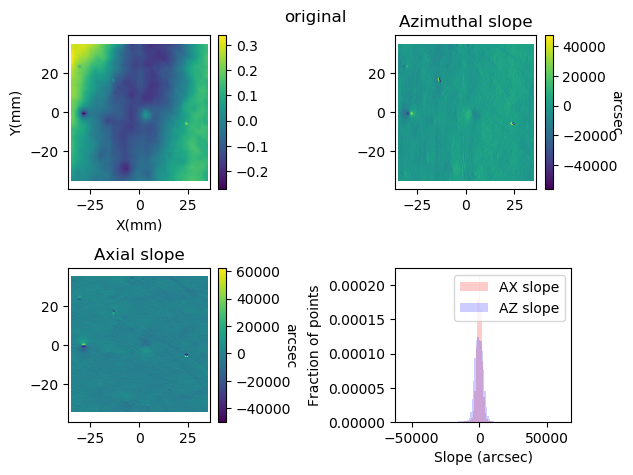

C:\Anaconda2\envs\py36\lib\site-packages\numpy\lib\nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


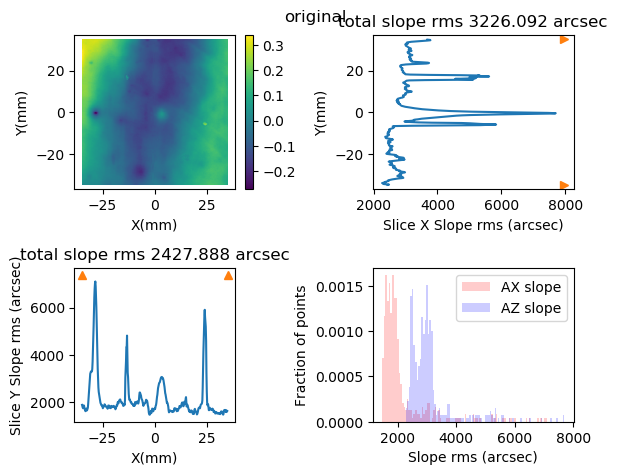

In [119]:
plt.figure()
plot_slope_2D(wdata,x,y)
plt.suptitle('figured')
display(plt.gcf())
plot_slope_slice(wdata,x,y)
plt.suptitle('figured')
display(plt.gcf())
plot_slope_2D(wdata2,x2,y2)
plt.suptitle('original')
display(plt.gcf())
plot_slope_slice(wdata2,x2,y2)
plt.suptitle('original')
display(plt.gcf())

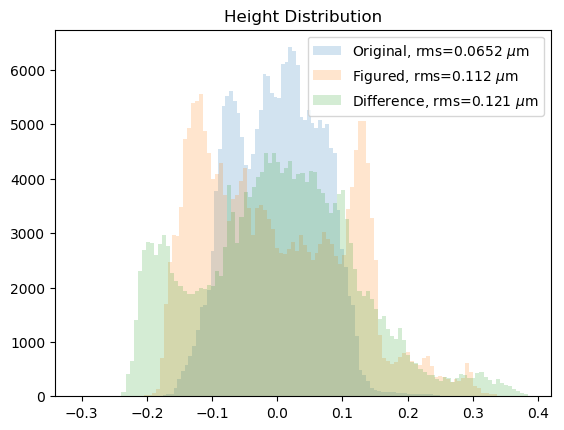

In [19]:
from pySurf.data2D import plot_stats

plt.figure('stats')
plt.clf()
stats = plot_stats ([wdata,wdata2,ddata],labels=['Original','Figured','Difference'])
plt.title('Height Distribution')  #change title from default
display(plt.gcf())

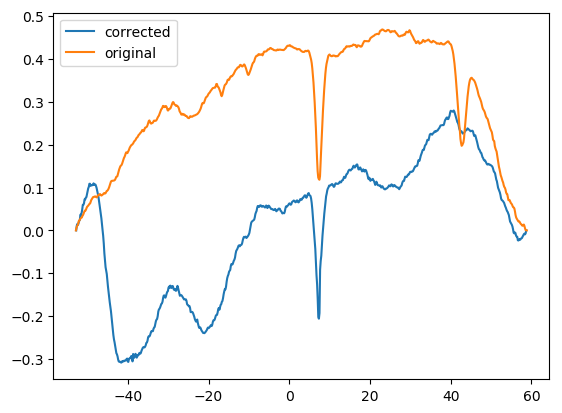

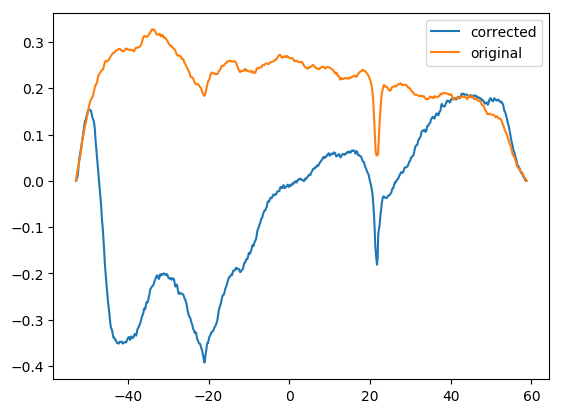

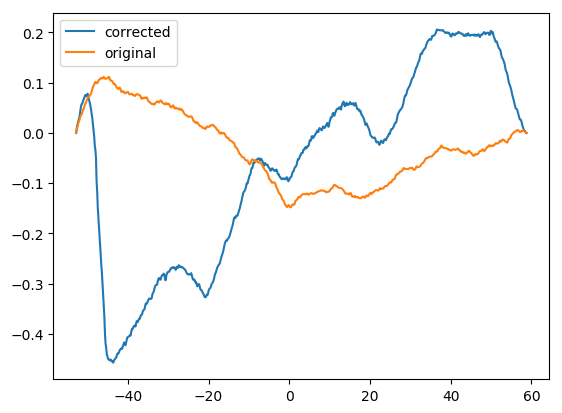

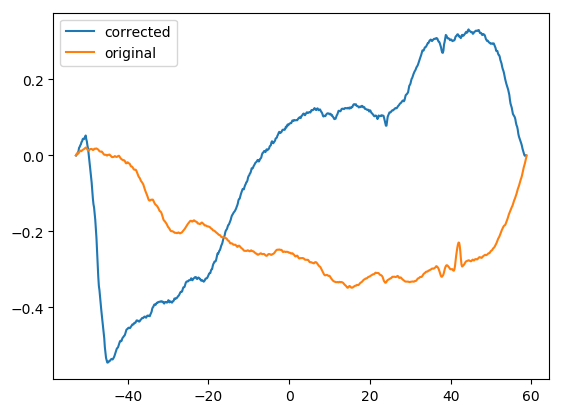

In [50]:
#plots a bunch of profiles
for i in range(0,400,100):
    plt.clf()
    plt.plot(y,wdata[:,i]-line(y,wdata[:,i]),label='corrected')
    plt.plot(y2,wdata2[:,i]-line(y2,wdata2[:,i]),label='original')
    plt.legend(loc=0)
    display(plt.gcf())

# Real TEST

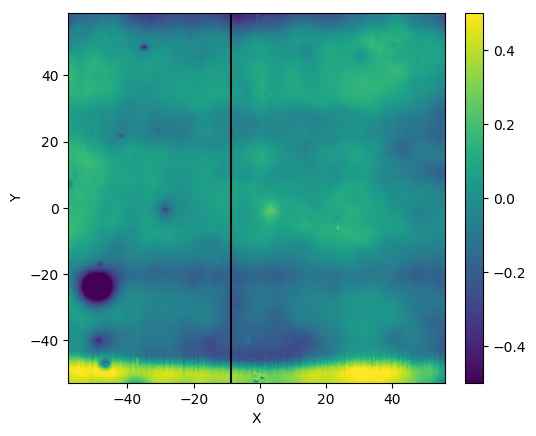

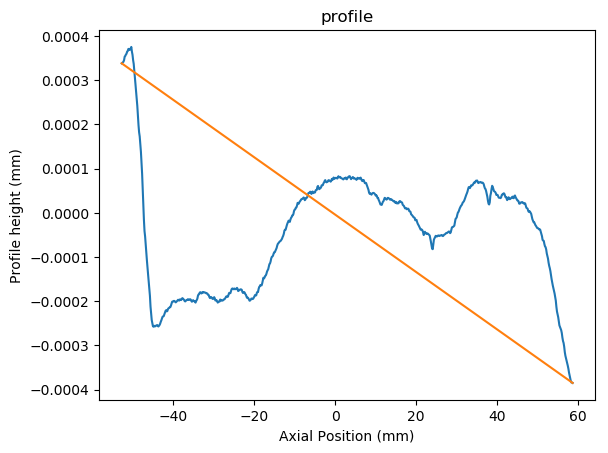

In [170]:
iselx=300

xx=y
yy=wdata[:,iselx]/1000.
xout=np.linspace(-50,50,10000)/206265.

plt.figure('Surface Figured')
plt.clf()
plot_data(wdata,x,y)
plt.vlines(x[iselx],*plt.ylim())
plt.clim([-0.5,0.5])
display(plt.gcf())

plt.figure('Profile')
plt.clf()
plt.title('profile')
plt.plot(xx,yy,label='Figured')
plt.plot(xx,line(xx,yy))
plt.xlabel('Axial Position (mm)')
plt.ylabel('Profile height (mm)')
display(plt.gcf())



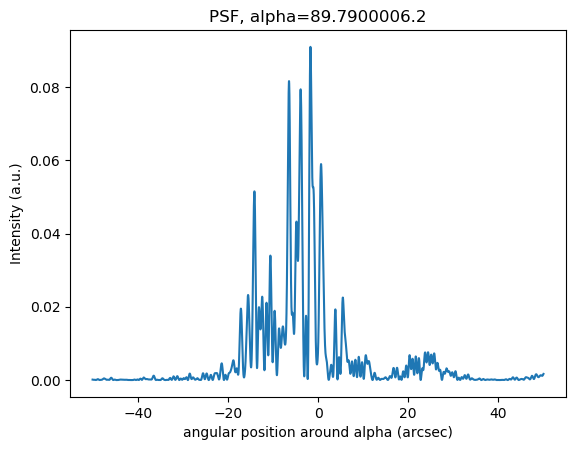

In [171]:
plt.figure('PSF')
plt.clf()
alpha=89.79
plt.title('PSF, alpha=%f6.2'%alpha)
xout,yout=PSF_spizzichino(xx,yy,alpha=alpha,xout=xout,level=True)
plt.xlabel('angular position around alpha (arcsec)')
plt.ylabel('Intensity (a.u.)')
plt.plot(xout*206265.,yout,label='Figured')
plt.show()
display(plt.gcf())

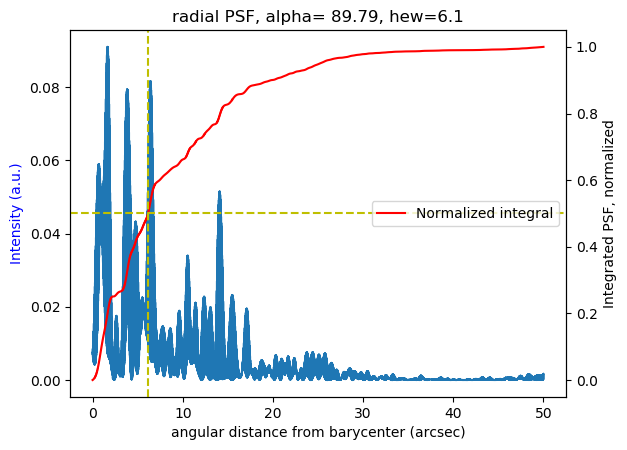

In [172]:
from pyProfile.profile import plot_HEW
    
plt.figure('Int PSF')
plt.clf()
plot_HEW(xout,yout)
plt.title('radial PSF, alpha=%6.2f, hew=%.2g'%(alpha,hew*206265.))
display(plt.gcf())

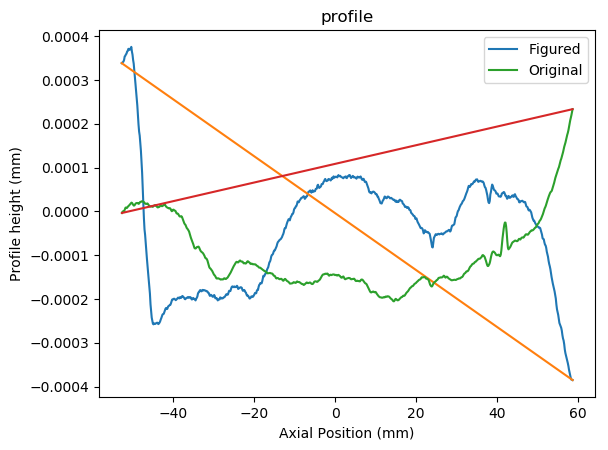

In [173]:
#add original data
iselx=300

xx=y2[1:-1]
yy=wdata2[1:-1,iselx]/1000.
xout=np.linspace(-50,50,10000)/206265.

"""
plt.figure('Surface Original')
plt.clf()
plot_data(wdata2,x2,y2)
plt.vlines(x[iselx],*plt.ylim())
plt.clim([-0.5,0.5])
display(plt.gcf())
"""
plt.figure('Profile')
plt.plot(xx,yy,label='Original')
plt.plot(xx,line(xx,yy))
plt.legend(loc=0)
display(plt.gcf())



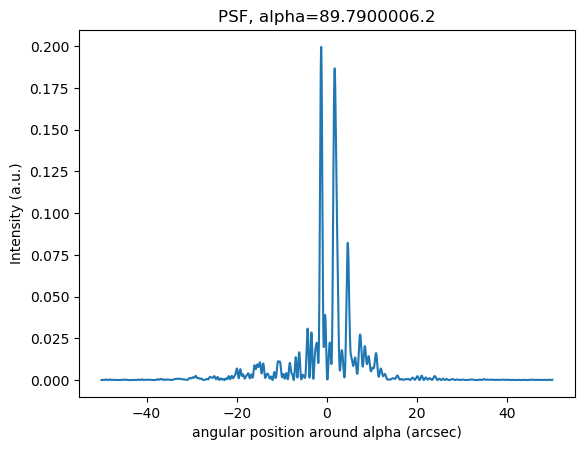

In [174]:
plt.figure('PSF')
plt.clf()
plt.title('PSF, alpha=%f6.2'%alpha)
xout,yout=PSF_spizzichino(xx,yy,alpha=alpha,xout=xout,level=True)
plt.xlabel('angular position around alpha (arcsec)')
plt.ylabel('Intensity (a.u.)')
plt.plot(xout*206265.,yout,label='Original')
plt.show()
display(plt.gcf())

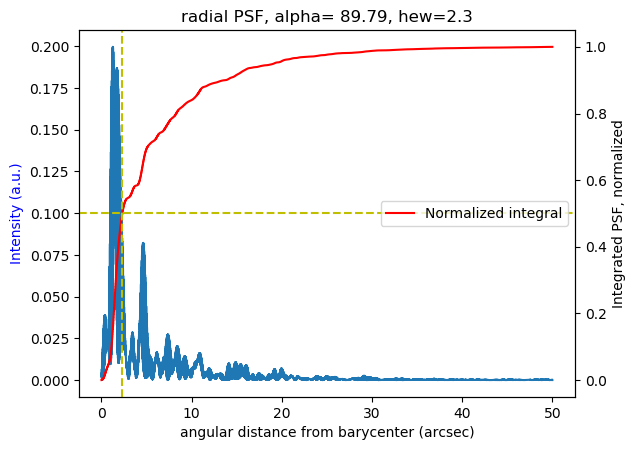

In [175]:
from pyProfile.profile import plot_HEW
    
plt.figure('Int PSF')
plt.clf()
hewor=plot_HEW(xout,yout)
plt.title('radial PSF, alpha=%6.2f, hew=%.2g'%(alpha,hewor*206265.))
display(plt.gcf())

In [ ]:
%qtconsole

In [207]:
plt.close('all')

#try to extend to entire surface
npoints=10000
xout=np.linspace(-50,50,npoints)/206265.  #in radians, convert to arcsec at end
alpha=89.79

def psf2d(y,wdata,xout,nskip=1):
    """return a 2d psf for axial profiles on wdata with coordinate y.
    """
    psf2d=[]
    for col in wdata[:,::nskip].T:
        yout=PSF_spizzichino(y,col/1000.,alpha=alpha,xout=xout)[1]
        psf2d.append(yout)
    return np.array(psf2d).T
    #return xout*206265.,np.array(yout)
    



In [210]:
plt.close('all')

#try to extend to entire surface
npoints=10000
xout=np.linspace(-50,50,npoints)/206265.  #in radians, convert to arcsec at end
alpha=89.79

def psf2d2(y,wdata,xout=None,nskip=1,alpha=0,energy=1.,
           level=True, HEW=True):
    """return a 2d psf for axial profiles on wdata with coordinate y.
    """
    psp = lambda x: PSF_spizzichino(y,x/1000,alpha=alpha,xout=xout,
                                    energy=energy,level=level)[1]
    psf2d=[]
    res=np.apply_along_axis(psp,0,wdata[:,::nskip])
    return res
    #return xout*206265.,np.array(yout)
    



In [214]:
%timeit psffig=psf2d(y,wdata,xout,nskip=50)

18.1 s ± 8.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [213]:
%%timeit 
psffig2=psf2d2(y,wdata,xout,nskip=50)

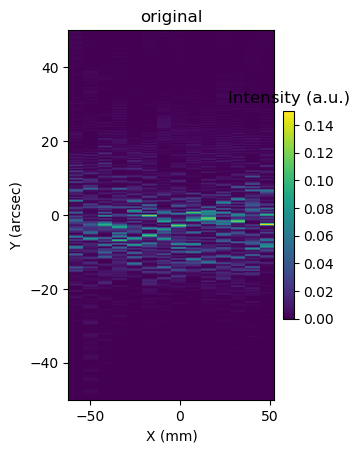

In [211]:
plt.close('all')
psffig2=psf2d2(y,wdata,xout,nskip=50)

plt.subplot(121)
plot_data(psffig,xt,xout*206265,aspect='auto',units=['mm','arcsec','Intensity (a.u.)'])
plt.clim([0,0.15])
plt.title('original')
display(plt.gcf())

In [178]:
nstep=50
tdata,xt,yt=wdata[:,::nstep].copy(),x[::nstep].copy(),y.copy()

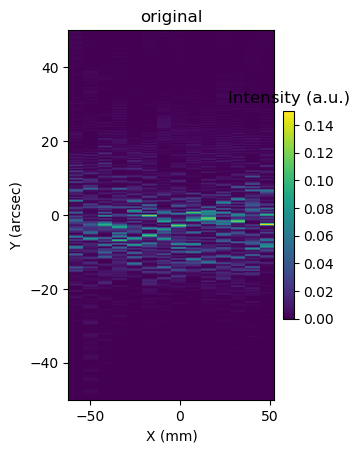

In [177]:
plt.close('all')
psffig=psf2d(y,wdata,xout,nskip=50)

plt.subplot(121)
plot_data(psffig,xt,xout*206265,aspect='auto',units=['mm','arcsec','Intensity (a.u.)'])
plt.clim([0,0.15])
plt.title('original')
display(plt.gcf())

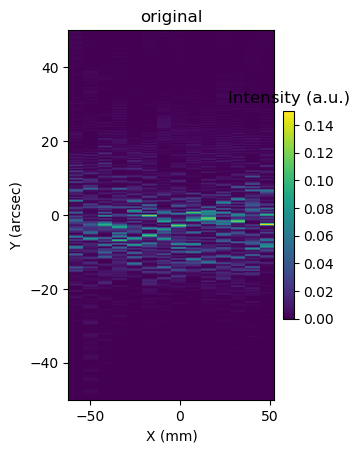

In [179]:
plt.close('all')
psffig=psf2d(yt,tdata,xout,nskip=1)

plt.subplot(121)
plot_data(psffig,xt,xout*206265,aspect='auto',units=['mm','arcsec','Intensity (a.u.)'])
plt.clim([0,0.15])
plt.title('original')
display(plt.gcf())

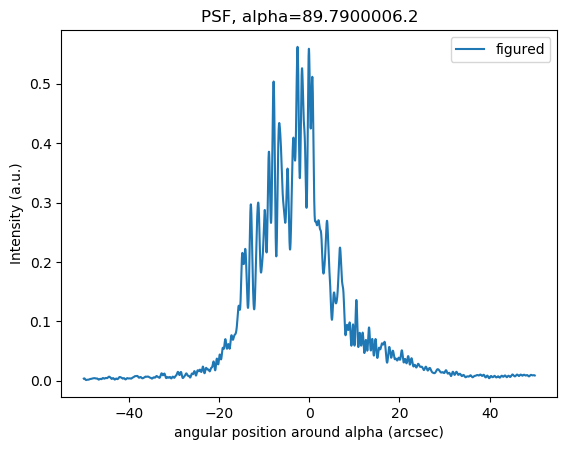

In [180]:
plt.clf()
plt.title('PSF, alpha=%f6.2'%alpha)
plt.xlabel('angular position around alpha (arcsec)')
plt.ylabel('Intensity (a.u.)')
#plt.plot(xout*206265,np.nansum(psfor,axis=1),label='original') #convert to arcsec
plt.plot(xout*206265,np.nansum(psffig,axis=1),label='figured') #convert to arcsec
plt.legend(loc=0)
display(plt.gcf())

In [139]:
#this is the core of spizzichino calculation function.
# try to vectorize for computational efficiency.

from dataIO.span import span
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

energy=1.
level=True

"""Try to use spizzichino theory as in PR notes to calculate Hthe PSF,
return a vector of same length as xout.
alpha is incidence angle from normal in degrees, alpha= 90 - shell slope for tilt removed profiles.
    Tilt can be included in the profile, in that case alpha is left to 0
   (total slope must be <0 and alpha>0, this means that profile with tilt is expected to be <0).
xout can set the output intervals in theta on the focal plane (from specular angle), if not set 512 points are used.
Lambda is wavelength in keV."""

lambda_mm=12.398425/energy/10**7

if xout is None:
    lout=1001
else:
    lout=len(xout)
L=span(xx,size=True)
deltax=L/(len(xx))

#calculate and remove slope as alpha. Profile tilt removed is yl
if level: 
    slope=line(xx,yy)
    yl=yy-slope
    #adjust incidence angle to include the slope removed from profile leveling. 
    # Increasing profile is positive slope angle:
    alpha=alpha*np.pi/180-np.arctan2(yy[-1]-yy[0],xx[-1]-xx[0])
else:
    yl=yy

if alpha<=0: raise ValueError

thmax= lambda_mm/(2*deltax*(np.pi/2-alpha))
#xout is the array of theta for the output
if xout is None:
    xout=np.linspace(alpha-thmax,alpha+thmax,lout)
else:
    xout=xout+alpha

scale=np.sqrt(2.)
I=np.array([np.abs(
    (deltax/L*(np.exp(2*np.pi*1.j/lambda_mm*(xx*(np.sin(alpha)-
        np.sin(theta))-scale*yl*(np.cos(alpha)+np.cos(theta)))))
    ).sum())**2 for theta in xout])

#-----------

psffig=psf2d(yt,tdata,xout,nskip=1)

plt.subplot(121)
plot_data(psffig,xt,xout*206265




In [218]:
psffig=psf2d(y,wdata,xout,nskip=1)
psfor=psf2d(y2,wdata2,xout,nskip=1)

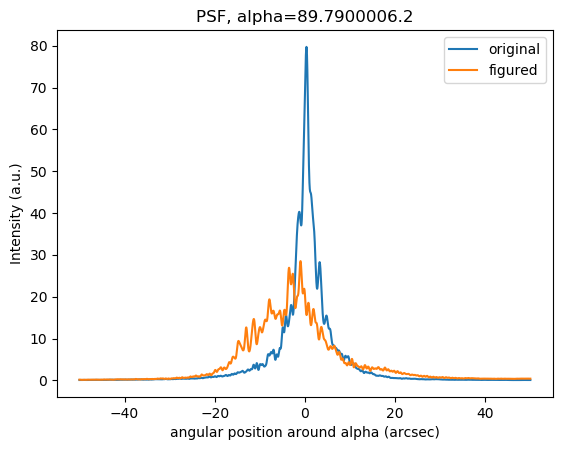

In [219]:
plt.clf()
plt.title('PSF, alpha=%f6.2'%alpha)
xout,yout=PSF_spizzichino(xx,yy,alpha=alpha,xout=xout,level=True)
plt.xlabel('angular position around alpha (arcsec)')
plt.ylabel('Intensity (a.u.)')
plt.plot(xout*206265,np.nansum(psfor,axis=1),label='original') #convert to arcsec
plt.plot(xout*206265,np.nansum(psffig,axis=1),label='figured') #convert to arcsec
plt.legend(loc=0)
display(plt.gcf())

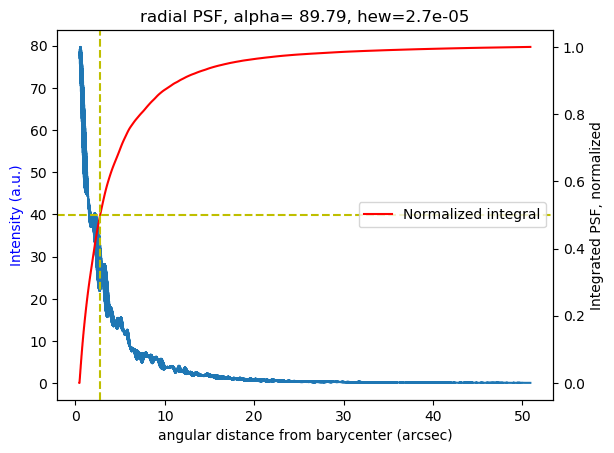

In [226]:
   
plt.figure('Int PSF')
plt.clf()
plt.title('radial PSF, alpha=%6.2f, hew=%.2g'%(alpha,2*plot_HEW(xout,np.nansum(psfor,axis=1))*206265))
display(plt.gcf())

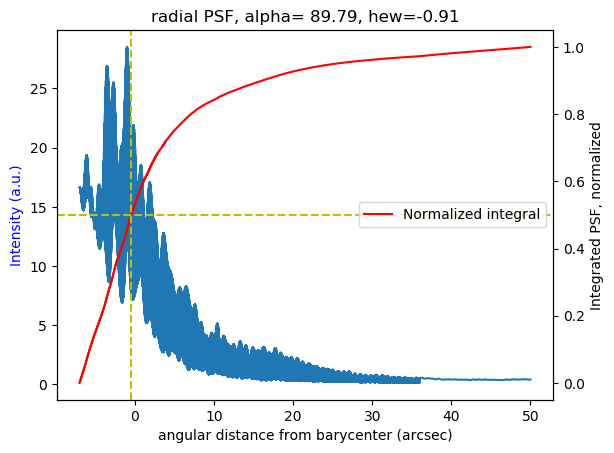

In [228]:
plt.figure('Int PSF')
plt.clf()
plt.title('radial PSF, alpha=%6.2f, hew=%.2g'%(alpha,2*plot_HEW(xout,np.nansum(psffig,axis=1))*206265))
display(plt.gcf())

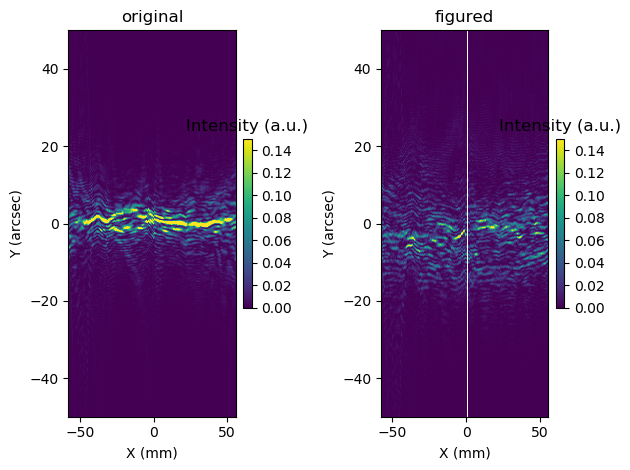

In [220]:
plt.close('all')
plt.subplot(121)
plot_data(psfor,x,xout*206265,aspect='auto',units=['mm','arcsec','Intensity (a.u.)'])
plt.clim([0,0.15])
plt.title('original')
plt.subplot(122)
plot_data(psffig,x,xout*206265,aspect='auto',units=['mm','arcsec','Intensity (a.u.)'])
plt.clim([0,0.15])
plt.title('figured')
plt.tight_layout()
display(plt.gcf())

In [ ]:
R=220.
theta,rad = np.meshgrid((x/R)[::100], xout) #rectangular plot of polar data

fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
ax.pcolor(theta, rad, psf2d) #X,Y & data2D must all be same dimensions
plt.show()

In [ ]:
plt.close('all')
nskip=10
R=220.
theta,rad = np.meshgrid((x/R)[::nskip], xout) #rectangular plot of polar data

fig = plt.figure()
#workaround for colorbar
from matplotlib import gridspec

gs = gridspec.GridSpec(1, 2,
                       width_ratios=[10,1],
                       )

ax1 = plt.subplot(gs[0], projection="polar", aspect=1.)
ax2 = plt.subplot(gs[1])
#ax1 = fig.add_subplot(111,polar=True)
im=ax1.pcolormesh(theta, rad, psf2d[:,::nskip]) #X,Y & data2D must all be same dimensions)
plt.colorbar(im, cax=ax2)
#plt.clim([0,0.10])

display(plt.gcf())

In [ ]:
plt.close('all')
nskip=10
R=220.

# try to convert points to polar coordinates before plot
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)


fig = plt.figure()
theta,rad = np.meshgrid((x/R)[::nskip], xout) #rectangular plot of polar data
theta[rad<0]=theta[rad<0]+np.pi
rad=np.abs(rad)


#workaround for colorbar
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2,
                       width_ratios=[10,1],
                       )


ax1 = plt.subplot(gs[0], projection="polar", aspect=1.)
ax2 = plt.subplot(gs[1])
#ax1 = fig.add_subplot(111,polar=True)
im=ax1.pcolormesh(theta, rad, psf2d[:,::nskip]) #X,Y & data2D must all be same dimensions)
plt.colorbar(im, cax=ax2)
#plt.clim([0,0.10])

display(plt.gcf())

In [ ]:
%qtconsole

resampling...


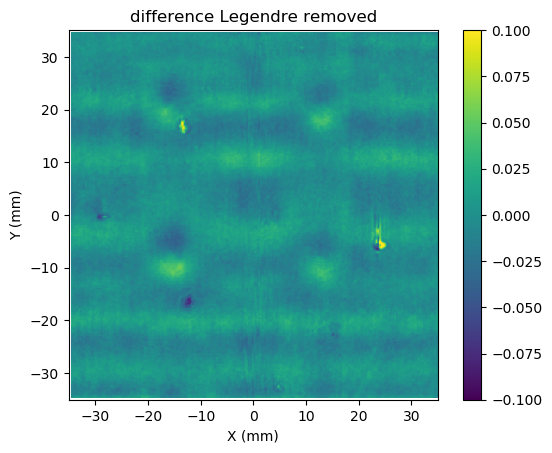

resampling...


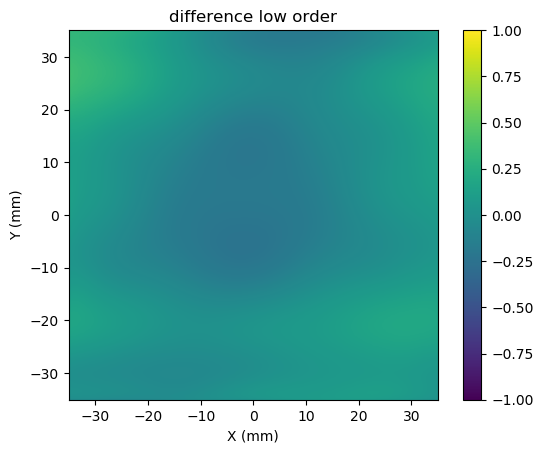

In [132]:
#plot legendre removed difference(it should be small)
plt.figure()
leg=legendre2d(ddata,10,10)
ddata=ddata-leg[0]

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('difference Legendre removed')  
plot_points(level_points(matrix_to_points2(ddata,dx,dy)),vmin=-0.1,vmax=0.1)
display(plt.gcf())

plt.clf()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('difference low order')  
plot_points(level_points(matrix_to_points2(leg[0],dx,dy)),vmin=-0.1,vmax=0.1)
display(plt.gcf())

## Compare PSDs

In [137]:
from pySurf.psd2d import psd2d_analysis,avgpsd2d
from pySurf.data2D import levellegendre


rmsrange=[[None,0.1],[0.1,0.2],[0.2,1],[1,None]]  #integration range of frequency for rms
ax2f=[0,1,1,0,0]             #   axis where to plot rms corresponding to intervals in rmsrange: 1 right, 0 left
wfun  = np.hanning           #   type of windows for fourier transform
units = ("mm","mm","$\mu$m") #   units of surface data from which PSD is calculated

vrange_surf=([-0.5,0.5])  #color scale of surface map
vrange_leg=([-0.05,0.05])   #color scale of legendre removed map
prange=np.array((1e-8,1.e-1))#np.array((5e-8,1.e-5))  #color scale of 2d psd plot

psd2d_analysis WARNING: `title` replaced `outname` and output figure will be no more generated.OUTNAME will be removed in next version, use title and save the plot after returning from routine.
freq. range [0.014: 0.1]
freq. range [ 0.1: 0.2]
freq. range [ 0.2:   1]
freq. range [   1: 3.4]


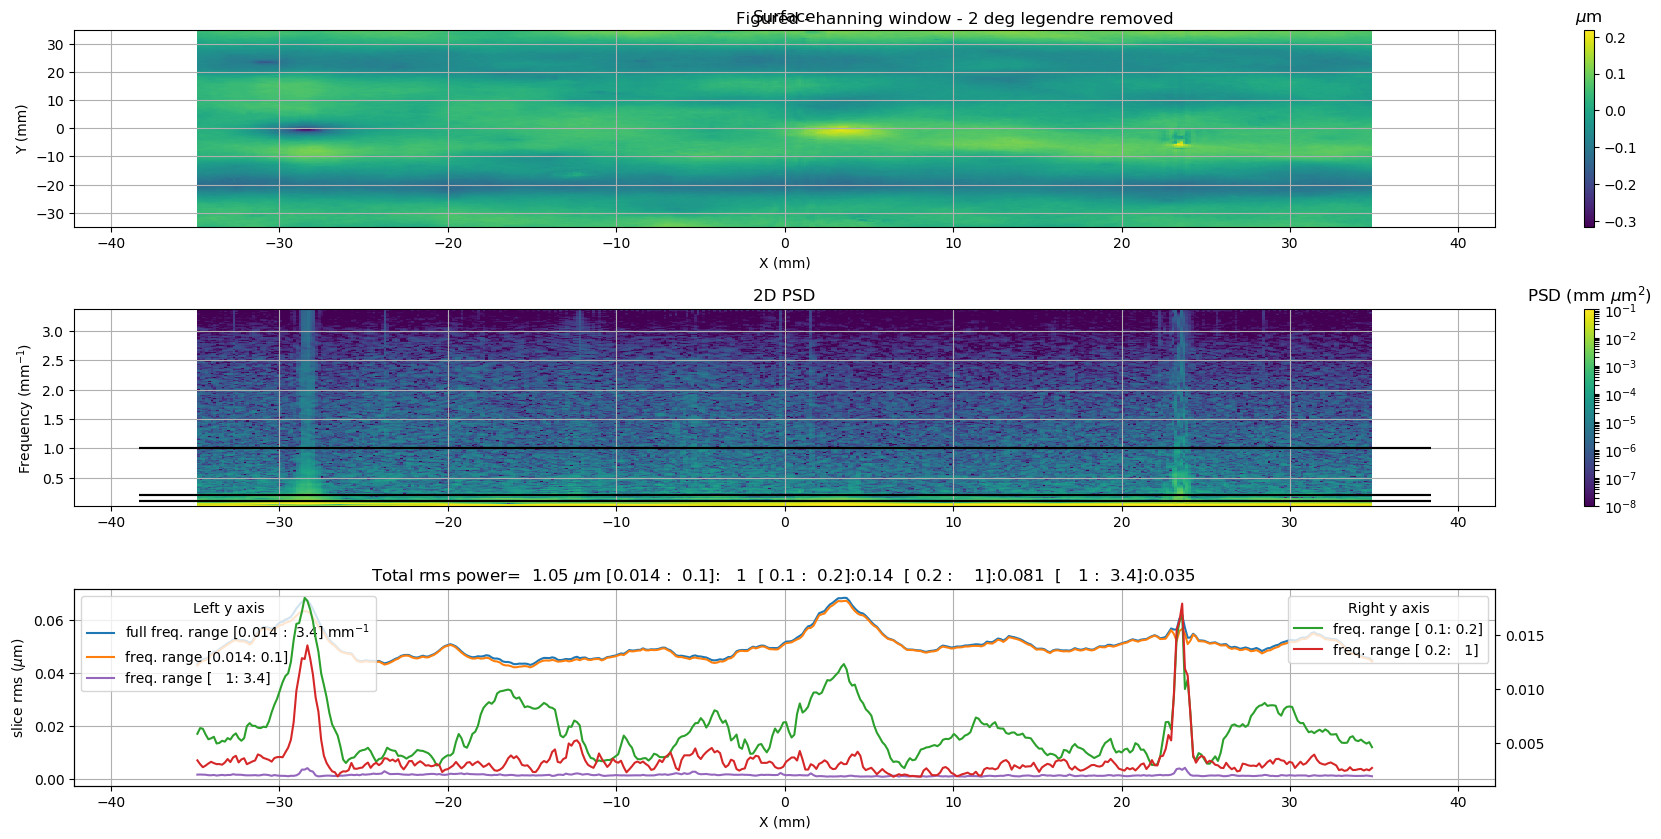

In [143]:
fs,ps=psd2d_analysis(levellegendre(y,wdata,2),x,y,outname="",wfun=np.hanning,
    rmsrange=rmsrange,prange=prange,ax2f=ax2f,units=units) #outname="" plots without creating output
ptot=avgpsd2d(ps)
plt.suptitle('Figured - hanning window - 2 deg legendre removed')
plt.savefig(fn_add_subfix(outfile2,'_MRF_full_psd2d','.png'))
display(plt.gcf())

freq. range [0.014: 0.1]
freq. range [ 0.1: 0.2]
freq. range [ 0.2:   1]
freq. range [   1: 3.4]


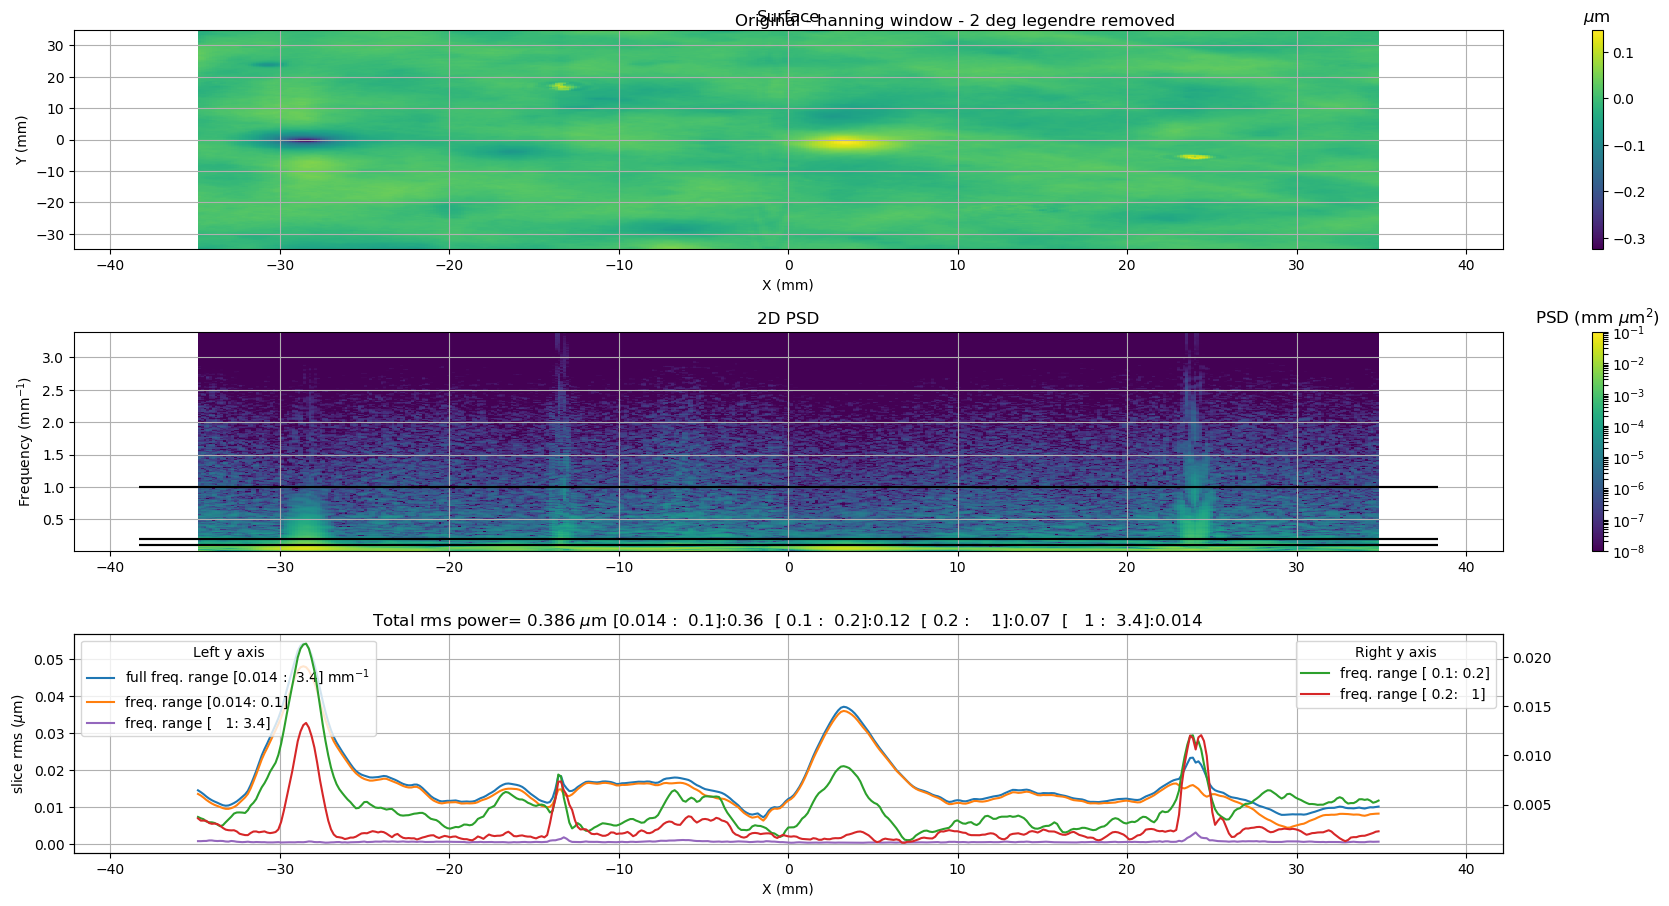

In [192]:
fs2,ps2=psd2d_analysis(levellegendre(y2,wdata2,2),x2,y2,title="",wfun=wfun,
    rmsrange=rmsrange,prange=prange,ax2f=ax2f,units=units)
plt.suptitle('Original - hanning window - 2 deg legendre removed')
plt.savefig(fn_add_subfix(outfile2,'_orig_full_psd2d','.png'))
display(plt.gcf())

ptot2=avgpsd2d(ps2)

In [212]:
plt.figure()
ax1=plt.subplot(211)
r1=plot_rms_power(fs,ps, rmsrange=rmsrange, ax2f=ax2f, units=units)
ax2=plt.subplot(212)
r2=plot_rms_power(fs2, ps2, rmsrange=rmsrange, ax2f=ax2f, units=units)

freq. range [   0: 0.1]
freq. range [ 0.1: 0.2]
freq. range [ 0.2:   1]
freq. range [   1: 3.4]
freq. range [   0: 0.1]
freq. range [ 0.1: 0.2]
freq. range [ 0.2:   1]
freq. range [   1: 3.4]


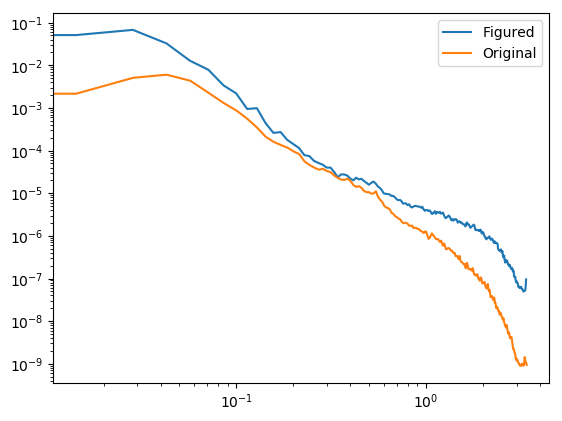

In [136]:
plt.figure('PSDs')
plt.clf()
plt.plot(fs,ptot,label='Figured')
plt.plot(fs2,ptot2,label='Original')
plt.loglog()
plt.legend(loc=0)
display(plt.gcf())